**Plot simple histogram from Tab file**
1 colum X, 3 column Y
- Read file 
- Calculate average and SD of the columns
- Fit with 1-3 gaussians
- Plot histogram with error bars and gaussian fits


[7.00608241 0.08275693 0.11850428] [4.95458378 0.32345439 0.05828463] [75.83538576  0.56224013  0.19742428]


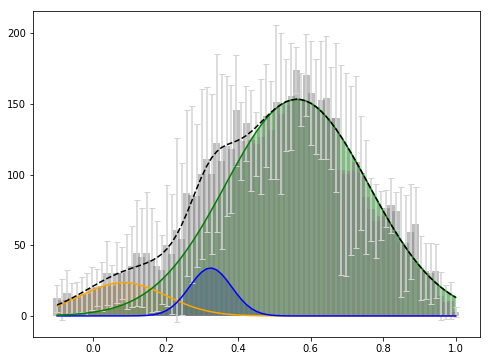

In [4]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import statistics
import scipy as scipy
from scipy import optimize
from statistics import mean
from matplotlib import gridspec

%matplotlib inline
from numpy import loadtxt

# Import data from a txt array. In this example, column 0 is x, column 1-3 are y. Tabs are used between columns. 
# We calculate and plot the mean and sd of y columns.
# If you have just one y column, keep only the first line, and replace moyenne [0,1] with lines[:,0], and remove sd when you plot the figure (not verified)

lines = loadtxt('test3col.txt', comments="#", delimiter="\t")
somme = np.array([(lines[:,1])+(lines[:,2])+(lines[:,3])])
nb = 3
moyenne = somme / nb

col = [[lines[:,1]],[lines[:,2]],[lines[:,3]]]
sd = np.std(col, axis=0)


# each gaussian is defined by its amplitude, center and sigma


def _1gaussian(x, amp1,cen1,sigma1):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((lines[:,0]-cen1)/sigma1)**2)))

#def _2gaussian(x, amp1,cen1,sigma1, amp2,cen2,sigma2):
 #   return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((lines[:,0]-cen1)/sigma1)**2))) + \
  #          amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((lines[:,0]-cen2)/sigma2)**2)))

def _3gaussian(x, amp1,cen1,sigma1, amp2,cen2,sigma2, amp3,cen3,sigma3):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((lines[:,0]-cen1)/sigma1)**2))) + \
            amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((lines[:,0]-cen2)/sigma2)**2))) + \
            amp3*(1/(sigma3*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((lines[:,0]-cen3)/sigma3)**2)))

# This is the fitting procedure, where p0 are the initial guesses, and bounds the acceptable bounds for each parameter 
# defined in _3gaussian

popt_3gauss, pcov_3gauss = scipy.optimize.curve_fit(_3gaussian, lines[:,0], moyenne[0,:], p0=[20,.2,.1, \
                                                                                            20,.5,.1, \
                                                                                            20,.8,.1]\
                , bounds = ((0,0,0,0,0,0,0,0,0),\
                            (np.inf, np.inf, 0.3, np.inf, np.inf, 0.3, np.inf, np.inf, 0.3)))
                                        

perr_3gauss = np.sqrt(np.diag(pcov_3gauss))


# The 2 lines below are used for a single Gaussian fitting

#popt_gauss, pcov_gauss = scipy.optimize.curve_fit(_1gaussian, lines[:,0], moyenne[0,:], p0=[10,.2,.1])

#perr_gauss = np.sqrt(np.diag(pcov_gauss))


# pars_n are the recovered paramters from the fit

pars_1 = popt_3gauss[0:3]
pars_2 = popt_3gauss[3:6]
pars_3 = popt_3gauss[6:9]

print(pars_1,pars_2,pars_3)


# This calaculates the individual gaussians
gauss_peak_1 = _1gaussian(lines[:,0], *pars_1)
gauss_peak_2 = _1gaussian(lines[:,0], *pars_2)
gauss_peak_3 = _1gaussian(lines[:,0], *pars_3)



fig = plt.figure(figsize=(8,6))
gs = gridspec.GridSpec(1,1)

ax1 = fig.add_subplot(gs[0])
ax1.bar(lines[:,0], moyenne[0,:], yerr=sd[0,:],width=.02, capsize=3, align='center',alpha=0.5, ecolor='lightgrey',color='grey')



ax1.plot(lines[:,0], gauss_peak_1, "orange")
ax1.fill_between(lines[:,0], gauss_peak_1.min(), gauss_peak_1, facecolor="orange", alpha=0.5)
  
ax1.plot(lines[:,0], gauss_peak_2, "blue")
ax1.fill_between(lines[:,0], gauss_peak_2.min(), gauss_peak_2, facecolor="blue", alpha=0.5)  

ax1.plot(lines[:,0], gauss_peak_3, "green")
ax1.fill_between(lines[:,0], gauss_peak_3.min(), gauss_peak_3, facecolor="green", alpha=0.5)  

ax1.plot(lines[:,0], _3gaussian(lines[:,0], *popt_3gauss), 'k--')